In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [29]:
probing_folder = 'logs/no_strategy_simsiam_cifar100_11-16_16-02/probing_ratio0.5/'

In [30]:
probe_df_list = []

# Read all csv, one for each experience on which probing has been executed
for file in os.listdir(probing_folder):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(probing_folder, file))
        # # Consider only rows with epoch = 4 (last epoch)
        # df = df[df['epoch'] == 4]
        probe_df_list.append(df)

### Final accuracy

In [31]:
final_df = probe_df_list[-1]

Final accuracy for each probing epoch.

In [32]:

for exp_idx, acc in enumerate(final_df['test_acc'].to_list()):
    print(f'Experiment {exp_idx} had final accuracy of {acc}')

Experiment 0 had final accuracy of 35.4
Experiment 1 had final accuracy of 42.4
Experiment 2 had final accuracy of 34.2
Experiment 3 had final accuracy of 39.0
Experiment 4 had final accuracy of 53.4
Experiment 5 had final accuracy of 41.0
Experiment 6 had final accuracy of 39.8
Experiment 7 had final accuracy of 42.6
Experiment 8 had final accuracy of 47.0
Experiment 9 had final accuracy of 45.8
Experiment 10 had final accuracy of 32.4
Experiment 11 had final accuracy of 49.0
Experiment 12 had final accuracy of 36.4
Experiment 13 had final accuracy of 40.0
Experiment 14 had final accuracy of 38.6
Experiment 15 had final accuracy of 39.6
Experiment 16 had final accuracy of 44.4
Experiment 17 had final accuracy of 39.6
Experiment 18 had final accuracy of 40.6
Experiment 19 had final accuracy of 43.4


Final Average Accuracy

In [33]:
final_avg_acc =  final_df['test_acc'].mean()
print(f'Final average accuracy: {final_avg_acc:.4f}')

Final average accuracy: 41.2300


### Anytime Accuracy

In [34]:
# Concat all rows having same exp_idx value across all df in probe_df_list
concatenated_df = pd.concat(probe_df_list, ignore_index=True)
concatenated_df.info()
grouped_df = concatenated_df.groupby('probing_exp_idx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   probing_exp_idx  400 non-null    int64  
 1   tr_loss          400 non-null    float64
 2   tr_acc           400 non-null    float64
 3   test_acc         400 non-null    float64
 4   stop_epoch       400 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 15.8 KB


In [35]:
sum_anytime_acc = 0

for probing_exp_idx, df in grouped_df:
    sum_anytime_acc += df['test_acc'].mean()

average_anytime_acc = sum_anytime_acc / len(grouped_df)

print(f'Average anytime accuracy: {average_anytime_acc:.4f}')


Average anytime accuracy: 40.5435


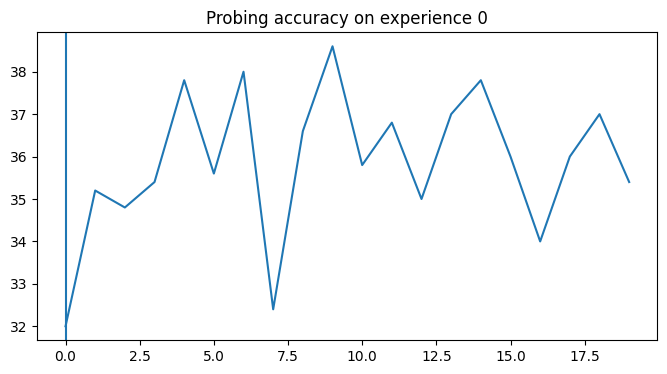

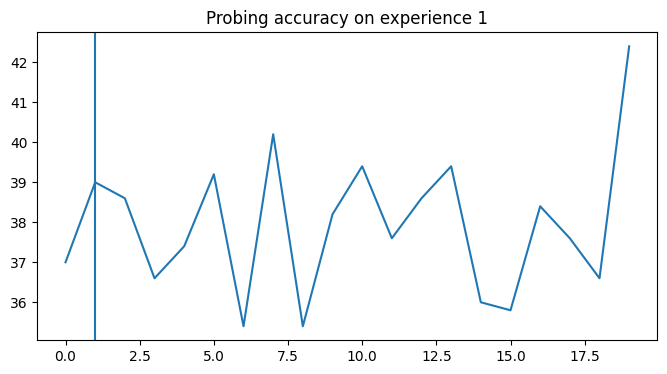

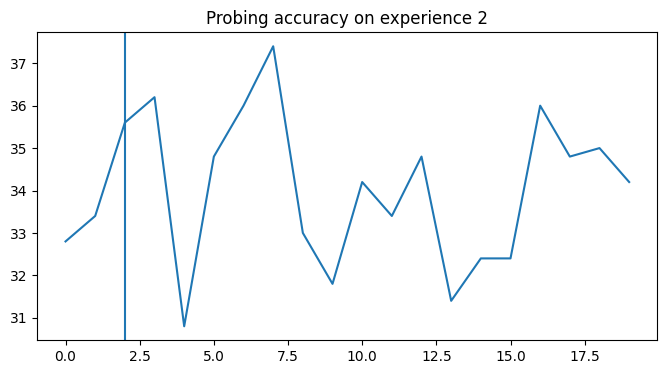

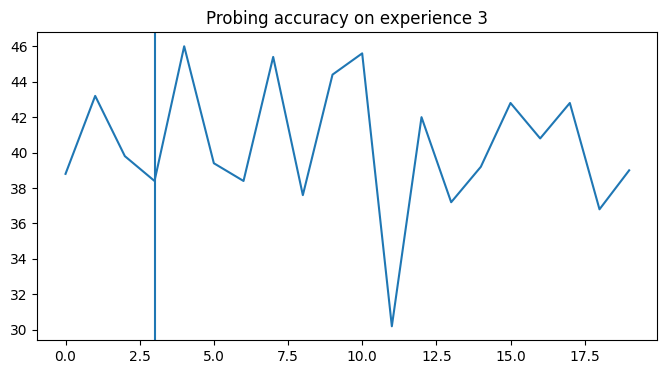

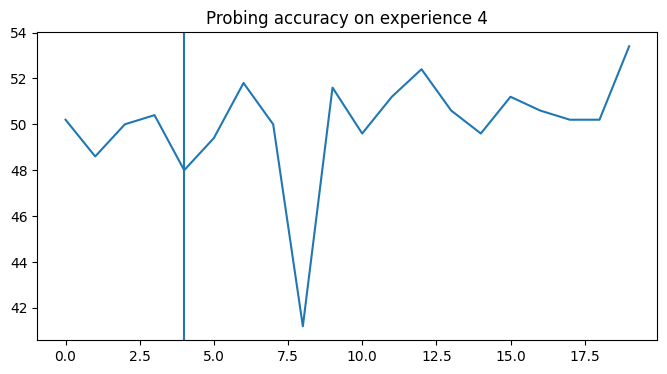

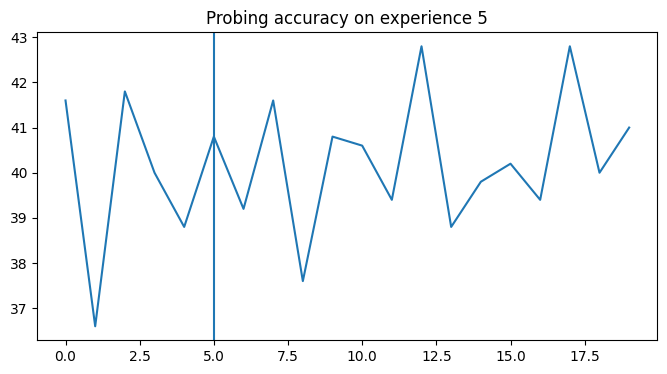

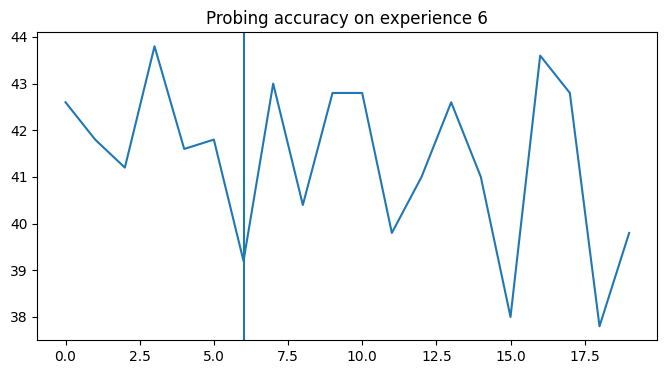

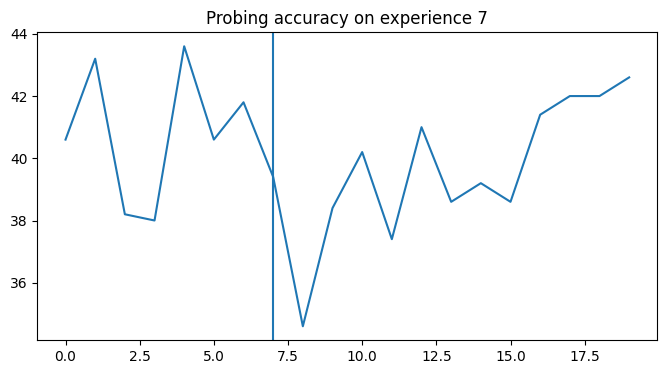

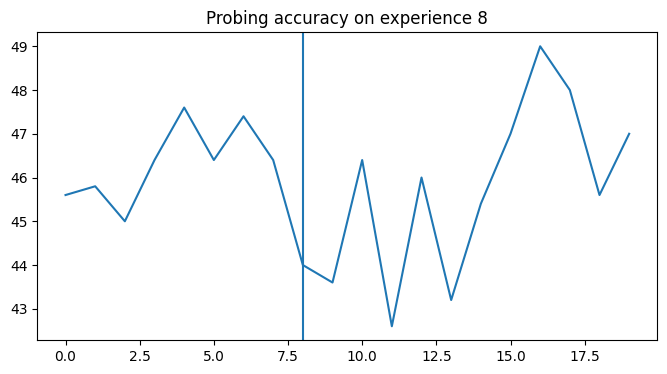

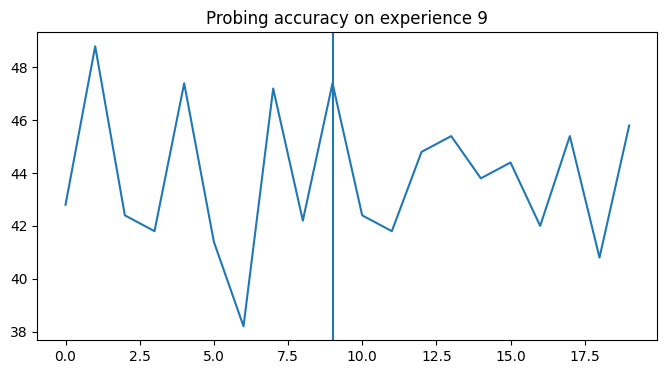

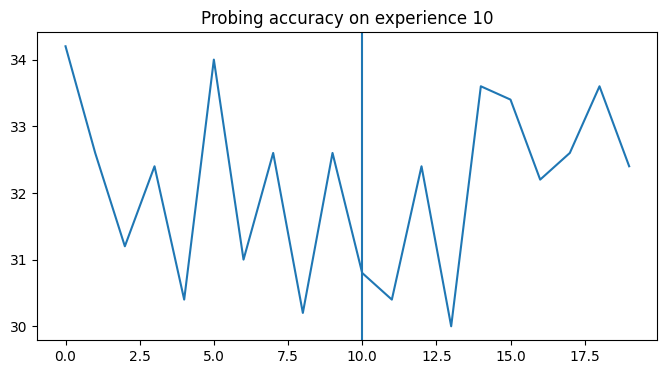

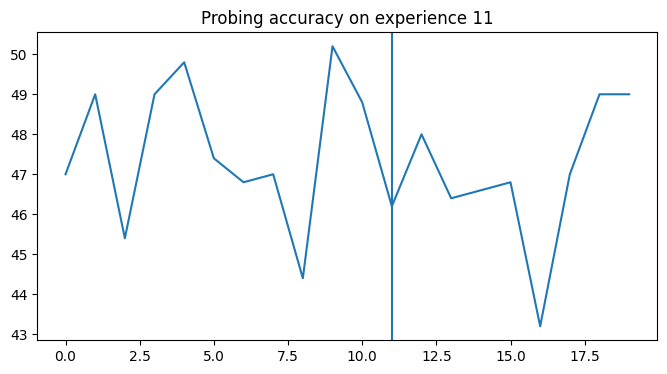

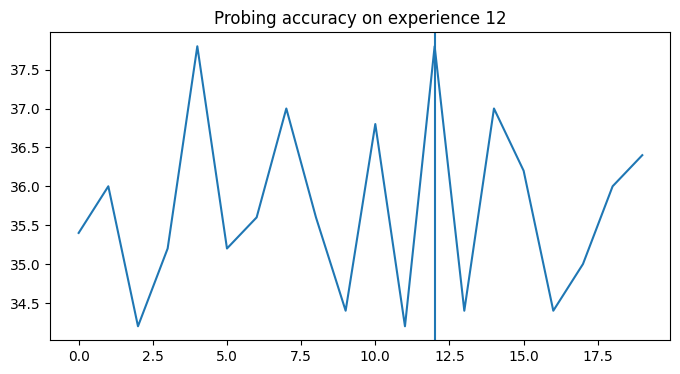

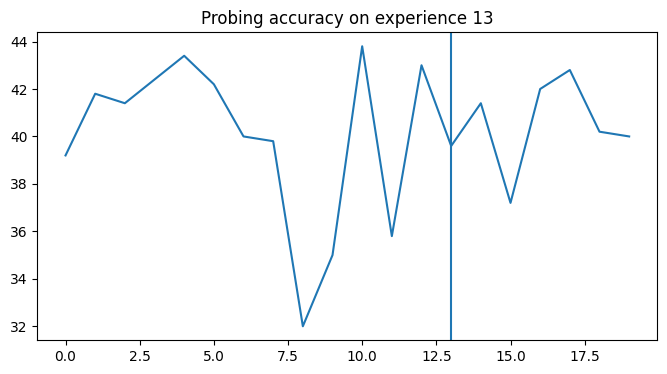

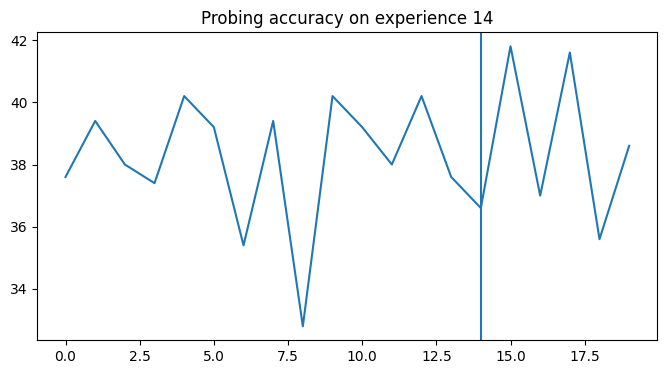

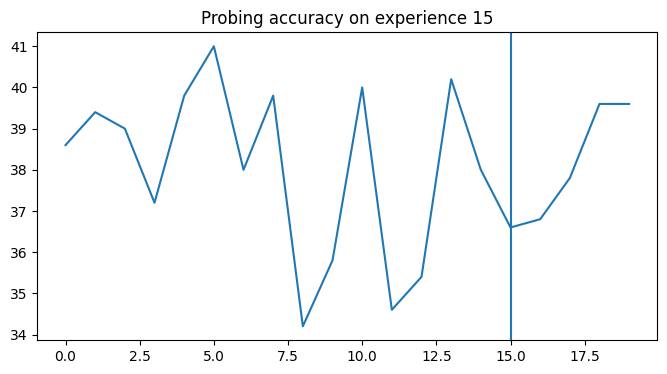

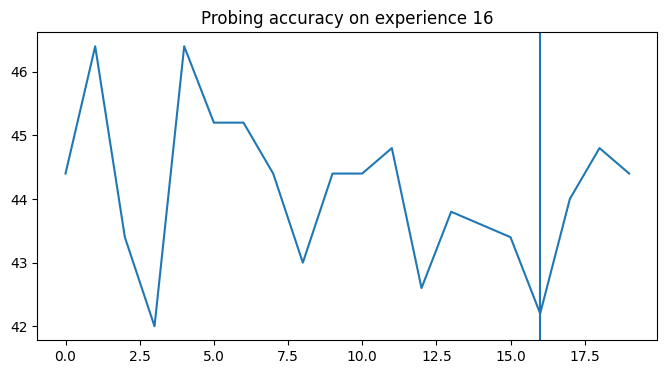

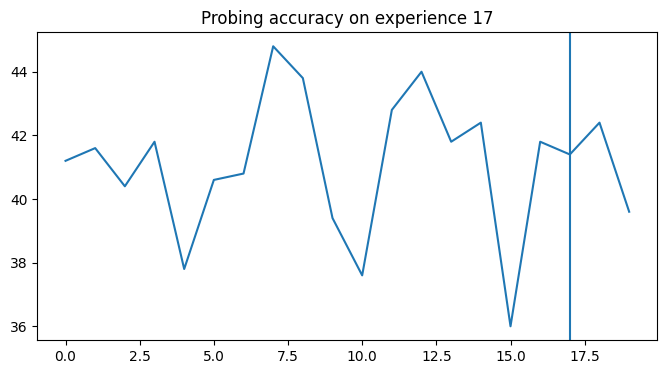

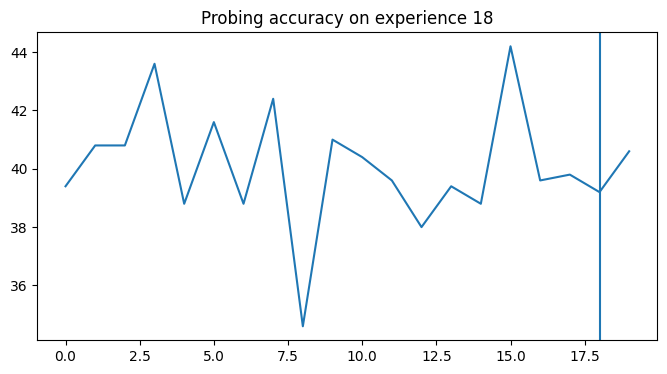

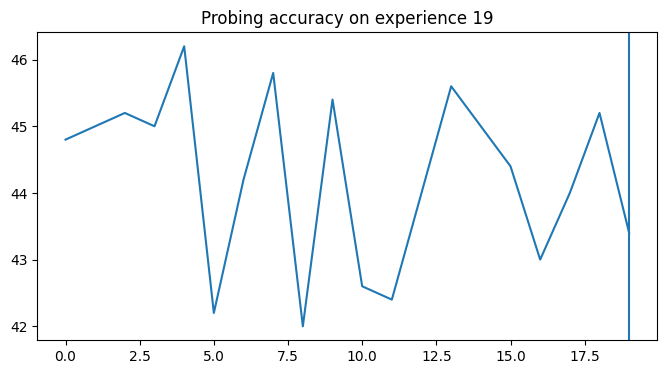

In [36]:
for probing_exp_idx, df in grouped_df:
    fig = plt.figure(figsize=(8, 4))

    plt.plot(df['test_acc'].to_list(), label=f'Probe on exp {probing_exp_idx}')

    plt.title(f'Probing accuracy on experience {probing_exp_idx}')
    # Plot a vertical line at exp_idx, same color 
    plt.axvline(x=probing_exp_idx, color=plt.gca().lines[-1].get_color())

    plt.show()

#plt.legend()
#plt.show()
